In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-blackscholes-solve)

We consider the Black–Scholes problem for the following parameter values:

In [2]:
Smax, T = 8, 6
K = 3
sigma = 0.06
r = 0.08

We discretize space and time.

In [3]:
m = 200
h = Smax / m
x = h * arange(m+1)
n = 1000
tau = T / n
t = tau * arange(n+1)
lamb, mu = tau / h**2, tau / h

We set the initial condition and then march forward in time.

In [4]:
V = zeros([m + 1, n + 1])
V[:, 0] = maximum(0, x - K)
for j in range(n):
    # Fictitious value from Neumann condition.
    Vfict = 2 * h + V[m-1, j]
    Vj = hstack([V[:, j], Vfict])
    # First row is zero by the Dirichlet condition.
    for i in range(1, m+1):
        diff1 = Vj[i+1] - Vj[i-1]
        diff2 = Vj[i+1] - 2 * Vj[i] + Vj[i-1]
        V[i, j+1] = (
            Vj[i]
            + (lamb * sigma**2 * x[i] ** 2 / 2) * diff2
            + (r * x[i] * mu) / 2 * diff1
            - r * tau * Vj[i]
        )

Here is a plot of the solution after every 250 time steps.

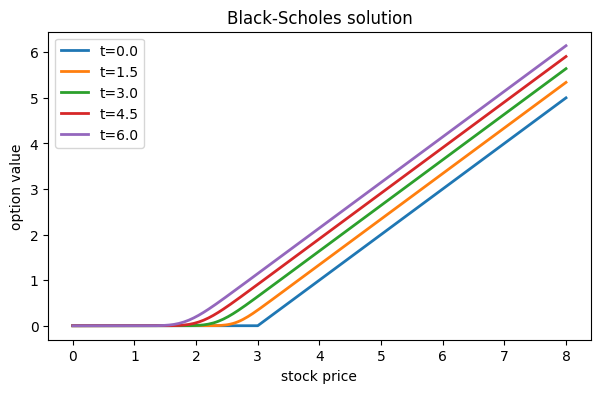

In [5]:
select_times = 250 * arange(5)
show_times = t[select_times]

for j, col in enumerate(select_times):
    plot(x, V[:, col], label=f"t={show_times[j]:.1f}")

legend()
xlabel("stock price"),  ylabel("option value")
title("Black-Scholes solution");

```{index} ! Python; animation
```

Alternatively, here is an animation of the solution.

In [6]:
from matplotlib.animation import FuncAnimation
fig = figure()
ax = fig.add_subplot(autoscale_on=False, xlim=(0, 8), ylim=(0, 6))
ax.grid()
ax.set_title("Black-Scholes solution")

line, = ax.plot([], [], '-', lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(j):
    line.set_data(x, V[:, j])
    time_text.set_text(f"t = {t[j]:.2f}")
    return line, time_text

anim = FuncAnimation(fig, animate, frames=range(0, n+1, 10), blit=True);
anim.save("black-scholes-6.mp4", fps=30)
close()

The results are easy to interpret, recalling that the time variable really means *time until strike*. Say you are close to the option's strike time. If the current stock price is, say, $S=2$, then it's not likely that the stock will end up over the strike price $K=3$, and therefore the option has little value. On the other hand, if presently $S=3$, then there are good odds that the option will be exercised at the strike time, and you will need to pay a substantial portion of the stock price in order to take advantage. As the time to strike increases, there is an expectation that the stock price is more likely to rise somewhat, making the value of the option larger at each fixed $S$.